<a href="https://colab.research.google.com/github/Sanjeevp-07/Model-Traning-EEG/blob/main/SHAP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive if files are stored there
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install shap


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the filtered depressed patient data
file_path = "/content/drive/MyDrive/Depressed_Patients.csv"
df_depressed = pd.read_csv(file_path)

# Drop unnecessary columns (Modify as needed)
df_depressed = df_depressed.drop(columns=["File", "Channel"], errors='ignore')  # Drop non-relevant columns

# Separate features (X) and target (y)
X_depressed = df_depressed.drop(columns=["Patient_Type"])  # Features
y_depressed = df_depressed["Patient_Type"]  # Target (Always 1 in this case)

# Scale the features
scaler = StandardScaler()
X_depressed_scaled = scaler.fit_transform(X_depressed)


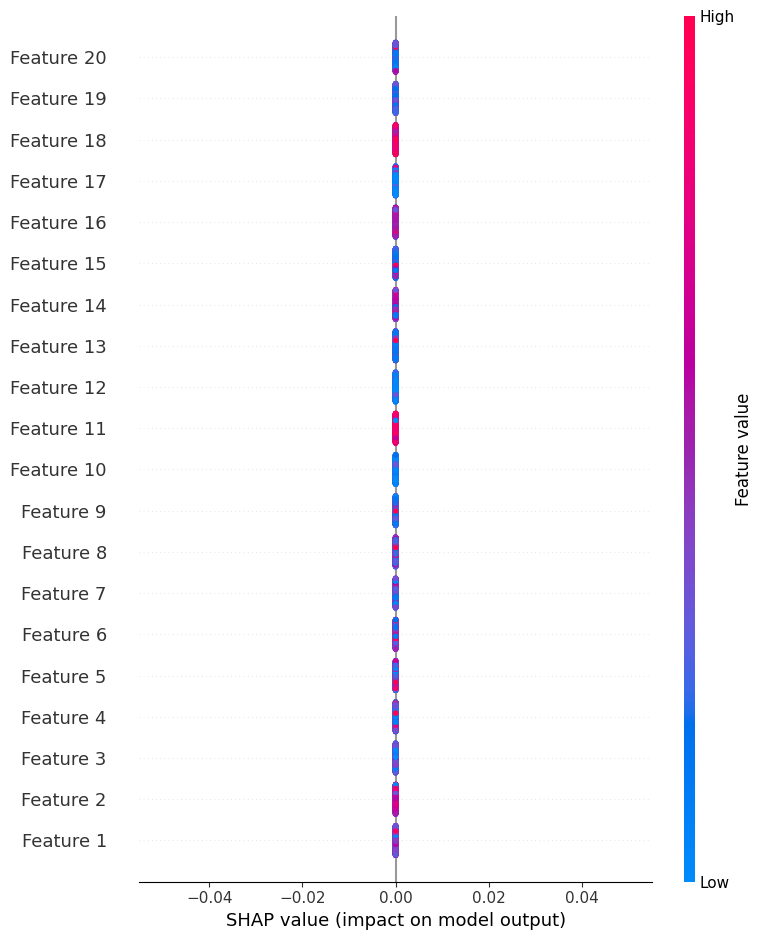

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_depressed_scaled, y_depressed)

# Create SHAP explainer
explainer = shap.Explainer(model, X_depressed_scaled)
shap_values = explainer(X_depressed_scaled)

# SHAP Summary Plot (Shows feature importance)
shap.summary_plot(shap_values, X_depressed_scaled)


✅ Model Training Complete!


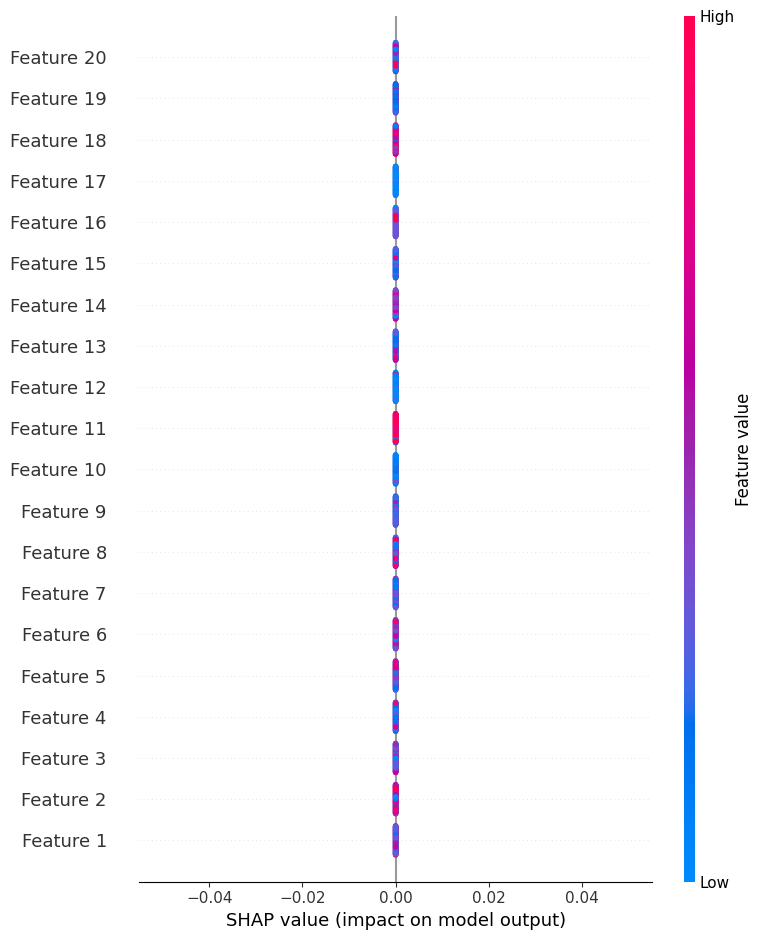

Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 🔹 Step 1: Load the Dataset (Only Depressed Patients)
df = pd.read_csv("/content/drive/MyDrive/Depressed_Patients.csv")

# 🔹 Step 2: Separate Features and Target Variable
X = df.drop(columns=["Patient_Type","File", "Channel"])  # Features
y = df["Patient_Type"]  # Target (1 = Depressed)

# 🔹 Step 3: Standardize the Data (Important for EEG)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Step 5: Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✅ Model Training Complete!")

# 🔹 Step 6: Apply SHAP for Explainability
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# 🔹 Step 7: Generate SHAP Summary Plot (Feature Importance)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.show()


from sklearn.metrics import accuracy_score

y_pred = model.predict(X_depressed_scaled)
print("Predicted labels:", y_pred)
print("Actual labels:", y_depressed.values)
print("Accuracy:", accuracy_score(y_depressed, y_pred))

